---
# Iris data exploration
---

In this notebook, we explore the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) provided by the `sklearn` library. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics, decomposition
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset and store it in the variable `iris`. 
# Notice that this is imported from the `sklearn` library. 
iris = datasets.load_iris() 
print(iris.DESCR) # This is the description of the data. 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

---
## Read into Pandas Dataframe
---
This is not really necessary but it makes it convenient to display the data in the notebook and manipulate it around while we figure out what to do with it. 

In [10]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# create a column called "label"
df_iris["label"] = iris.target 
# and another column for the actual species name
df_iris["species"] = [iris.target_names[label] for label in iris.target] 
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Plot PCA projections

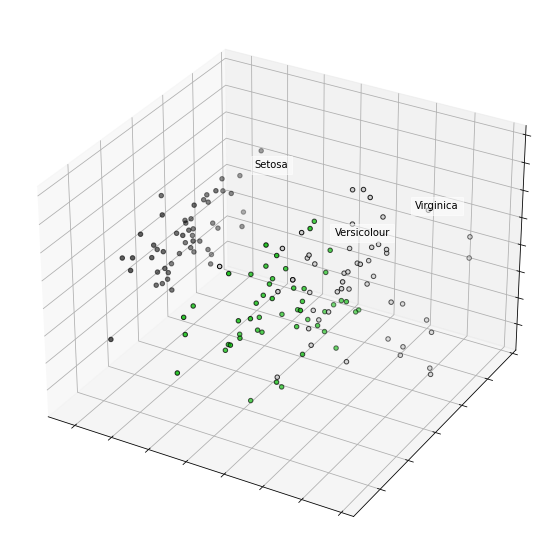

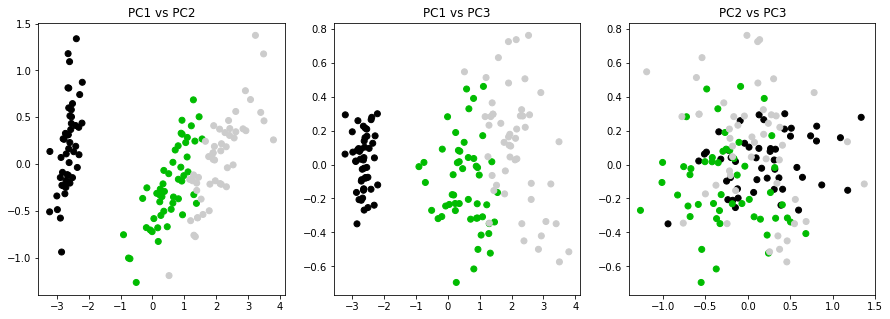

In [4]:
X = df_iris.iloc[:, :4]
y = df_iris["label"]


fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = fig.add_subplot(projection='3d')

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral)
ax[0].set_title("PC1 vs PC2")

ax[1].scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.nipy_spectral)
ax[1].set_title("PC1 vs PC3")

ax[2].scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral)
ax[2].set_title("PC2 vs PC3");

## Training an SVM classifier

In [11]:
# Create a classifier, we will use a support vector machine here. 
clf = svm.SVC()

# Shuffle and split the data into training and testing set. 
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, shuffle=True
)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30




### Display confusion matrix

Confusion matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


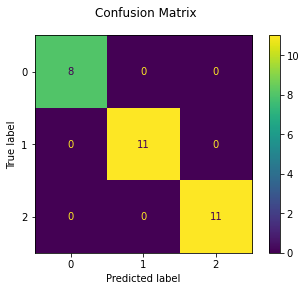

In [6]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")